# Naive Bias model

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = sns.load_dataset("iris")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
x = df.iloc[:, :-1]
y = df.iloc[ : , -1:]
y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [6]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB().fit(x,y)
model.predict([[2,3,5,2]])

c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\hp\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


array(['virginica'], dtype='<U10')

In [7]:
# checking the accuracy
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)
y_pred = model.predict(x_test)
y_pred

array(['virginica', 'versicolor', 'setosa', 'virginica', 'setosa',
       'virginica', 'setosa', 'versicolor', 'versicolor', 'versicolor',
       'virginica', 'versicolor', 'versicolor', 'versicolor',
       'versicolor', 'setosa', 'versicolor', 'versicolor', 'setosa',
       'setosa', 'virginica', 'versicolor', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'versicolor',
       'setosa'], dtype='<U10')

In [24]:
from sklearn import metrics
score = metrics.accuracy_score(y_test,y_pred)
print("the accuracy score is: ",score*100,"&")

the accuracy score is:  100.0 &


In [25]:
# confusion matrix
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[11,  0,  0],
       [ 0, 13,  0],
       [ 0,  0,  6]], dtype=int64)

Text(0.5, 1.0, 'Gussian Naive bayes: 1.0')

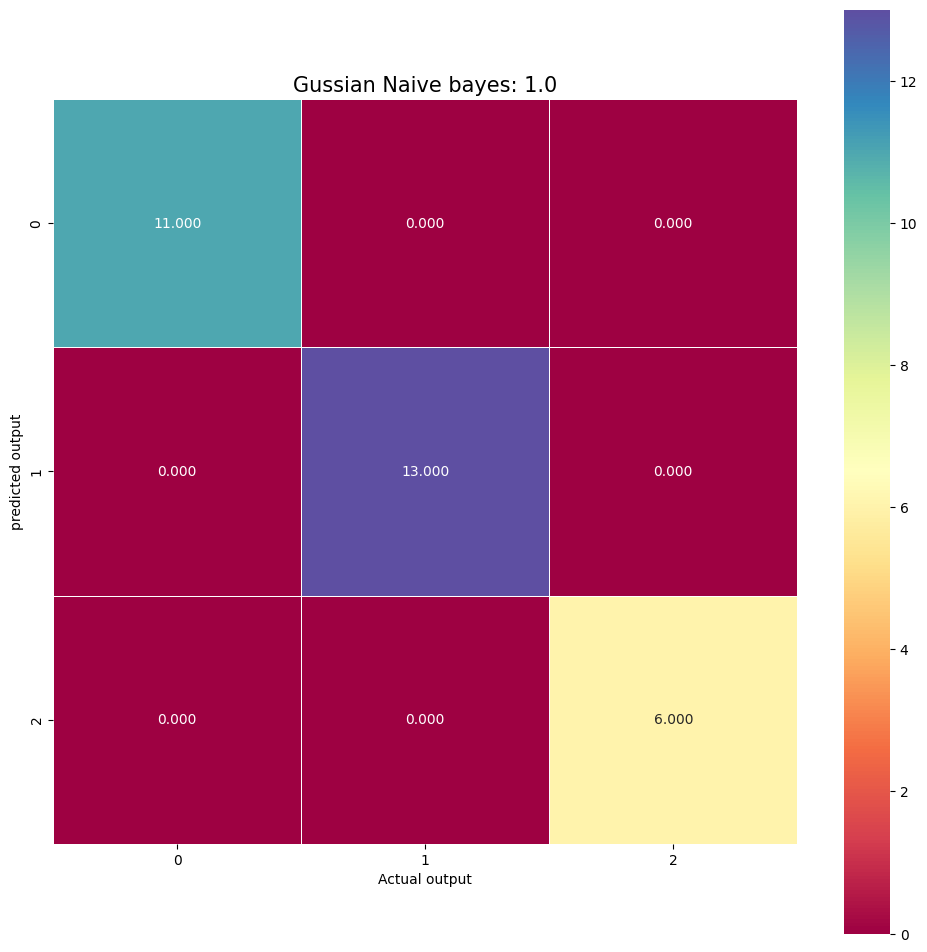

In [26]:
plt.figure(figsize=(12,12))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True,cmap='Spectral')
plt.xlabel('Actual output')
plt.ylabel('predicted output')
all_sample_title= 'Gussian Naive bayes: {0}'.format(score)
plt.title(all_sample_title,size=15)